In [69]:
import cv2 as cv
import os
import pandas as pd
import numpy as np

In [70]:
def load(path):
    x = []
    y = []
    for brand in os.listdir(path):
        for img in os.listdir(os.path.join(path,brand)):
            img = cv.imread(os.path.join(path,brand,img))
            x.append(img)
            y.append(os.listdir(path).index(brand))
    return x,y

In [71]:
x_train, y_train = load('Dataset/train/')
x_test, y_test = load('Dataset/test/')
print('Train',len(x_train),len(y_train))
print('Test',len(x_test),len(y_test))
# 0 = adidas
# 1 = converse
# 2 = nike

Train 711 711
Test 114 114


In [72]:
def show(img):
    cv.imshow('test',img)
    cv.waitKey(0)
    cv.destroyAllWindows()
i = 500 #Random Testing
print(y_train[i])
show(x_train[i])

2


In [73]:
def preProcess(img):
    img = cv.resize(img, (300,300))
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    return img.flatten()

In [74]:
x_train = [preProcess(x) for x in x_train]
x_test = [preProcess(x) for x in x_test]

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def getAccuracy(Model):
    modelInst = Model()
    modelInst.fit(x_train, y_train)
    y_pred = modelInst.predict(x_test)
    return accuracy_score(y_test, y_pred), classification_report(y_test, y_pred)

for model in [GaussianNB, LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier]:
    print(model)
    reports = getAccuracy(model)
    print(reports[0])
    print(reports[1])

# reports = getAccuracy(LogisticRegression)
# print(reports[0])
# print(reports[1])

<class 'sklearn.naive_bayes.GaussianNB'>
0.37719298245614036
              precision    recall  f1-score   support

           0       0.39      0.71      0.50        38
           1       0.33      0.03      0.05        38
           2       0.36      0.39      0.38        38

    accuracy                           0.38       114
   macro avg       0.36      0.38      0.31       114
weighted avg       0.36      0.38      0.31       114

<class 'sklearn.linear_model._logistic.LogisticRegression'>
0.47368421052631576
              precision    recall  f1-score   support

           0       0.49      0.53      0.51        38
           1       0.47      0.53      0.49        38
           2       0.47      0.37      0.41        38

    accuracy                           0.47       114
   macro avg       0.47      0.47      0.47       114
weighted avg       0.47      0.47      0.47       114

<class 'sklearn.svm._classes.SVC'>
0.543859649122807
              precision    recall  f1-score 

In [ ]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
param = {'C': [1, 5, 10, 50],
         'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc, param, n_jobs=8)
grid.fit(x_train, y_train)
y_pred = grid.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Deeplearning

In [77]:
# Importing Libraries
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [78]:
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory='Dataset/merged',
                                                     target_size=(300, 300),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory='Dataset/merged',
                                                     target_size=(300, 300),
                                                     subset='validation',
                                                    ),
}

Found 744 images belonging to 3 classes.
Found 81 images belonging to 3 classes.


In [79]:
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))
base_model.load_weights('/home/saksham/GBC/Maths-II/AASD-4005-Advance-Maths-Term-Project/Part_2/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')
base_model.trainable = False

In [80]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [81]:
opt = optimizers.Adam(learning_rate=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 3)                 1539      
                                                      

In [83]:
batch_size = 32
epochs = 10

train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [84]:
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 23
validation_steps : 2


In [95]:
filepath = "./model_{epoch:02d}-{val_accuracy:.2f}.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/10
23/23 [==============================] - ETA: 0s - loss: 0.4368 - accuracy: 0.8230
Epoch 1: val_accuracy improved from -inf to 0.82812, saving model to ./model_01-0.83.h5
23/23 [==============================] - 8s 366ms/step - loss: 0.4368 - accuracy: 0.8230 - val_loss: 0.5435 - val_accuracy: 0.8281
Epoch 2/10
23/23 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.8596
Epoch 2: val_accuracy did not improve from 0.82812
23/23 [==============================] - 8s 324ms/step - loss: 0.3827 - accuracy: 0.8596 - val_loss: 0.5934 - val_accuracy: 0.8281
Epoch 3/10
23/23 [==============================] - ETA: 0s - loss: 0.3716 - accuracy: 0.8539
Epoch 3: val_accuracy did not improve from 0.82812
23/23 [==============================] - 7s 323ms/step - loss: 0.3716 - accuracy: 0.8539 - val_loss: 0.5434 - val_accuracy: 0.8125
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: 0.3443 - accuracy: 0.8624
Epoch 4: val_accuracy improved from 0.828

In [102]:
loaded_best_model = keras.models.load_model("model_04-0.84.h5")
test_loss, test_acc = loaded_best_model.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 1s 53ms/step - loss: 0.5714 - accuracy: 0.8272
test accuracy :  0.8271604776382446


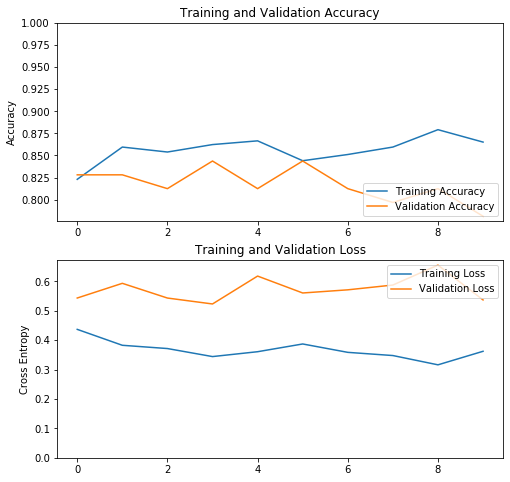

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [104]:
def predict(path):
    img = cv.imread(path)
    img = cv.resize(img, (300,300))
    img = img/255.0

    p = loaded_best_model.predict(img[np.newaxis, ...])

    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}
    for i,j in zip(list(labels.values()),list(p[0])):
        print(i,j)

In [105]:
predict('Dataset/train/nike/62.jpg')

1/1 [==============================] - 1s 732ms/step
adidas 0.08757732
converse 0.13458873
nike 0.777834


In [106]:
predict('Dataset/test/adidas/5.jpg')

1/1 [==============================] - 0s 23ms/step
adidas 0.9809837
converse 0.0031029969
nike 0.01591338


In [107]:
predict('Dataset/test/converse/13.jpg')

1/1 [==============================] - 0s 22ms/step
adidas 0.068535514
converse 0.9041755
nike 0.027289014
